Demo code for Neural Operator <br>
Author: yuanye_zhou@buaa.edu.cn

# 背景知识

&emsp;神经算子网络有别于一般的神经元网络，其特点为利用神经元网络去学习一类算子。因为算子是个抽象的概念，并不对应到具体的数据，因此初学者往往觉得算子学习有点晦涩难懂。 <br>  &emsp;这里提供一些学习资料，帮助初学者掌握算子学习。

#### 【名词定义】

&emsp; **算子**是一个**函数空间**到**函数空间**上的**映射**O：X→X。广义上的算子可以推广到任何空间，如内积空间等。  <br>
&emsp; 广义的讲，对任何函数进行某一项操作都可以认为是一个算子，甚至包括求**幂次**，**开方**都可以认为是一个算子，只是有的算子我们用了一个符号来代替他所要进行的运算罢了，所以大家看到算子就不要纠结，它甚至和**加减乘除**的基本运算符号都没有区别，只是他可以对单对象操作罢了(有的符号比如**大于**、**小于**号要对多对象操作)。[1] <br>
#### 【基本原理】
&emsp;**算子学习**就是使用神经元网络去拟合一个算子。 <br>
&emsp;尽管算子作用在函数上，利用神经元网络去拟合的时候，其实无法将一个函数作为神经元网络的输入。为了让神经元网络可以拟合算子，还需要将算子转化为数据来表达。Lu 等人[2]在 DeepONet 论文中提及‘Although our goal is
to learn operators, which take a function as the input, we have to represent the input functions discretely, so that network approximations can be applied.’<br>
<br>
&emsp;**如何使用数据来表达算子？**<br>
&emsp;假设我们的算子是函数的求导运算$D$, 对于任意的函数 $u$($x$), 均可以在$u$上施加我们的算子$D$, 得到函数的导数 $u'$ = $D$($u$) = $du(x)$/$dx$ 。我们可以让 $u$ 是幂次方、开方、三角函数、加减乘除、或者某类偏微分方程等等任意形式的函数。而无论是那种函数形式，求导运算的规则总是一致的。基于这个认知，我们可以在给定的数据点$x$上，构造不同的$u$($x$)数据，比如$x^2$,$sin(x)$,等等，再得到这些不同函数的导数，比如$2x$,$cos(x)$,等等，从而实现算子的数据化表达。 <br><br>
&emsp;**如何使用神经元网络来拟合数据化算子？**<br>
&emsp;我们知道算子可以被数据化表达，但这种表达仍然是抽象的概念，还需要构造特定的神经元网络结构，才能实现算子的拟合。根据算子万能逼近理论[2]：<br>
![](https://ai-studio-static-online.cdn.bcebos.com/1e358d0b53aa4139b135bccb5bc06ac5938c83c00615418c9e60f7f4d38e922b)

&emsp;算子的拟合可以表达为分支（Branch）与主干(Trunk)的乘法，其中分支处理一个定函数$u$在一系列固定坐标点$x$的运算，主干则处理任意坐标点$y$的运算。需要注意公式中$y$并不是函数的输出，而是与$x$一样，均为计算域内的点。不同点在于$x$是固定的，$y$是任意的。

&emsp;于是我们可以构建神经元网络符合算子万能逼近理论，如下所示[2]：<br>
![](https://ai-studio-static-online.cdn.bcebos.com/2693e18c5efc4e57af3a39d5dd931d314b1cff7bc4534a14959c5588ffefc19b)
![](https://ai-studio-static-online.cdn.bcebos.com/1f521d3b43fb4075a69d462a5baf2b356f10e3c1e4e24d1f83127e788aee1dcf)
![](https://ai-studio-static-online.cdn.bcebos.com/683937b9f160482b82acfc94b8fe8ad546497dcf850e430989000a7ccb3af2ff)
<br>
&emsp;分支和主干分别对应一个神经元网络，分支网络输出与主干网络的输出进行乘法运算并求和。分支网络的输入为固定坐标点$x$上的函数值，主干网络的输入为任意坐标点$y$的坐标值。

&emsp;以上述函数导数为例，希望求 $cos(x)$ 的导数：<br>
&emsp;假设固定坐标点$x$个数为$m$，则分支网络的输入为 $cos(x)$的 1x$m$ 矩阵，输出为 1x$p$ 矩阵$b$；当$y$包含n个坐标点时，主干网络的输入为$n$x1，输出为 $n$x$p$ 矩阵$t$；分支与主干输出相乘 $t$*$b^T$,得到 $n$x1 的矩阵，这个结果就是$cos(x)$在坐标的$x=y$上的导数。 <br>
&emsp;主干网络与一般的神经元网络没有差异，分支网络的输入神经元节点数与固定坐标点$x$的个数一致，在训练网络的时候，需要构造多组不同函数，这时候分支网络的输入变为$h$x$m$，主干网络的输入还是与输出不变，但是分支与主干合成后的输出为$n$x$h$，其中$h$为函数的个数。<br>
#### 【傅立叶算子】
&emsp;上面我们介绍了算子学习的基本原理，接下来介绍傅立叶算子。<br>
##### 【傅立叶变换和微积分】
&emsp;傅立叶变换的基本原理是：任意的连续函数总能写成一个无穷傅立叶级数。<br>
&emsp;对于1维函数$s(x)$，离散的傅立叶级数展开式为：[3] <br>
![](https://ai-studio-static-online.cdn.bcebos.com/81320f265357474eabd56b3ea15f8cf5513c6214760e4fa5980410a14407bfb1)
其中 $N$ 表示级数的个数，$P$ 表示计算域的长度。<br>
&emsp;$a_n$,$b_n$的计算公式为：<br>
![](https://ai-studio-static-online.cdn.bcebos.com/411fecdb3a2c4b3ead14a2cf016dfd6448d4cb7ac6fe452395bd8b15c0eea31e)
<br>
&emsp;为了简便描述，离散的傅立叶级数展开式可以改写为复数形式：<br>
![](https://ai-studio-static-online.cdn.bcebos.com/ebd18daf665f43d9a5081a63e101150654fc2db80b5e4fdcbfcb4ba866407fdd)
<br>
&emsp;其中$c_n$是复数，计算公式为：<br>
![](https://ai-studio-static-online.cdn.bcebos.com/c1bbfff74d4d456e874ce449f98788ab323565880dbd4ed2a0049658a49cd3e3)
<br>
&emsp;上面这个公式就是傅立叶变换的公式，我们把关注重点从函数$s(x)$本身转换到了傅立叶级数的系数$c_n$上，这也就是时域到频域的变换，因为每个系数$c_n$都对应一个特定频率的三角函数。<br>
&emsp;我们知道对于任意的$sin(Ax)$,其一阶微分为$Acos(Ax)$,二阶微分为$-A^2sin(Ax)$,三阶微分为$-A^3cos(Ax)$, ..., 很自然的，$c_n$和其对应三角函数的微分在运算的时候$c_n$始终保持不变，只需要对三角函数进行微分即可。关于三角函数的微分，上面的案例已经展示了其结构并不复杂，特别是在复数表达下则更加简洁；相应的，积分表达也不复杂。关于复数运算和复变函数的书籍可以参考[4]。
##### 【傅立叶算子学习】
&emsp;**结合了傅立叶变化和算子学习的网络应该是什么样的呢？**<br>
&emsp;本质上，傅立叶算子学习是在同一个边界条件和控制方程的前提下，学习任意给定若干个物理场到另外若干个物理场的映射关系。这点与DeepONet不同，DeepONet可以处理不同边界条件甚至不同控制方程下的算子学习，比如任意函数的求导运算。但是傅立叶算子学习把时域下的学习转化为频域下的学习，可以实现训练耗时更短和精度更高。将算子万能逼近理论公式转化到频域下，有：<br>
![](https://ai-studio-static-online.cdn.bcebos.com/533b19b62de545d6a45cd3e28f1fcb46e463d4e89c064bc8914711541cc583a1)
<br> &emsp; 其中时域两个函数相乘的积分，可以表达为频域下两个函数的乘法[5]。

&emsp; 因此从一个给定物理场出发，经过若干次迭代，每次迭代都进行一次傅立叶变化与逆变换，就可以计算得到希望映射的物理场，这就是FNO[6]的网络结构：<br>
![](https://ai-studio-static-online.cdn.bcebos.com/4ec72dba85e34db9ba748ceddefa27045c5e210d4e304eb796a56eef7ec07991)
<br>
&emsp; 注意：FNO网络的特点是输入一个物理场，输出一个物理场。而DeepONet输入坐标，输出对应坐标上的物理量。
<br> &emsp; 关于FNO的深入介绍，推荐阅读这篇文档[7]，需要注意FNO并不是只能做时序物理场的映射，还可以做空间物理场的映射，比如大气温度场和速度场之间的映射，因为算子是函数到函数的映射。

#### 【总结】
&emsp; 算子学习的理论基础（算子万能逼近理论）建立在求解PDE方程的格林函数方法之上，运用格林函数法，能够设计出性能优越的网络结构。

#### 【参考文献】
[1] 科普中国网 https://www.kepuchina.cn/wiki/ct/201803/t20180318_558207.shtml <br>
[2] Lu, L., Jin, P., Pang, G., Zhang, Z., & Karniadakis, G. E. (2021). Learning nonlinear operators via DeepONet based on the universal approximation theorem of operators. Nature machine intelligence, 3(3), 218-229. <br>
[3] 维基百科 https://zh.wikipedia.org/wiki/%E5%82%85%E9%87%8C%E5%8F%B6%E7%BA%A7%E6%95%B0 <br>
[4] 知乎 https://zhuanlan.zhihu.com/p/91184296 <br>
[5] 知乎 https://zhuanlan.zhihu.com/p/108803395 <br>
[6] Li, Z., Kovachki, N., Azizzadenesheli, K., Liu, B., Bhattacharya, K., Stuart, A., & Anandkumar, A. (2020). Fourier neural operator for parametric partial differential equations. arXiv preprint arXiv:2010.08895. <br>
[7] 知乎 https://zhuanlan.zhihu.com/p/533488795

# 代码实践

## 1. 基础定义

In [ ]:
# 导入库

import paddle
import numpy as np
import matplotlib.pyplot as plt

# 定义MLP网络

class MyNet(paddle.nn.Layer):
    def __init__(self,numIN,numOUT,numHidden,numLayer):
        super().__init__()
        self.IN = paddle.nn.Linear(numIN,numHidden) # 输入层
        self.FC_layers = [] # 隐藏层
        for i in range(numLayer - 1):
            fc_layer = paddle.nn.Linear(numHidden,numHidden)
            self.FC_layers.append(fc_layer)
        self.OUT = paddle.nn.Linear(numHidden,numOUT)  # 输出层
        self.ACT = paddle.nn.functional.tanh
    

    def forward(self, inputs):
        H = inputs
        H = self.IN(H)
        H = self.ACT(H)
        for fc_layer in self.FC_layers:
            H = fc_layer(H)
            H = self.ACT(H)
        outputs = self.OUT(H)      
        return outputs

## 2. 具体案例

### 2.1 使用 DeepONet 学习$sin(ax)$对$x$的求导运算
（代码执行顺序：0. 重启内核; 1.基础定义; 2.执行本节代码）

In [ ]:
# 定义DeepONet输出


class Output(paddle.nn.Layer):

    def __init__(self,b_fun,t_fun):
        super().__init__()
        self.b_fun = b_fun 
        self.t_fun = t_fun 

    def forward(self, Xb, Xt):
        b_pred = self.b_fun(Xb)
        t_pred = self.t_fun(Xt)
        t_pred = paddle.nn.functional.tanh(t_pred)
        b_pred = paddle.transpose(b_pred, perm=[1, 0])
        y_pred = paddle.matmul(t_pred,b_pred)
        return y_pred

class DataLoss(paddle.nn.Layer):

    def __init__(self,b_fun,t_fun):
        super().__init__()
        self.b_fun = b_fun 
        self.t_fun = t_fun 

    def forward(self, Xb, Xt, Y_true):
        b_pred = self.b_fun(Xb)
        t_pred = self.t_fun(Xt)
        t_pred = paddle.nn.functional.tanh(t_pred)
        b_pred = paddle.transpose(b_pred, perm=[1, 0])
        Y_pred = paddle.matmul(t_pred,b_pred)
        loss = paddle.sum(paddle.square(Y_pred - Y_true))
        return loss

In [ ]:
# 调用 Branch Net， Trunk Net， Loss， 最终输出

p = 100
m = 100
BranchNet = MyNet(m,p,32,4) # 固定m个坐标点
TrunkNet = MyNet(1,p,12,3)

lr = 0.001
train_parameter = BranchNet.parameters() + TrunkNet.parameters()
optimizer = paddle.optimizer.Adam(learning_rate=0.001,parameters=train_parameter)

Loss = DataLoss(BranchNet,TrunkNet)
Pred = Output(BranchNet,TrunkNet)

In [ ]:
# 生成训练数据

# 定义训练用函数 y = sin(ax)

def fun(x,a):
    y = paddle.sin(a*x)
    dydx = a * paddle.cos(a*x)
    return y,dydx


# 固定x坐标点
X = np.linspace(0,2*np.pi,m)
X = paddle.to_tensor(X,dtype='float32')
X = X.reshape([1,m])

# 构造BranchNet输入
Xb1,Yb1 = fun(X,paddle.rand([1]))
Xb2,Yb2 = fun(X,paddle.rand([1]))
Xb3,Yb3 = fun(X,paddle.rand([1]))
Xb4,Yb4 = fun(X,paddle.rand([1]))
Xb5,Yb5 = fun(X,paddle.rand([1]))

Xb = paddle.concat([Xb1,Xb2,Xb3,Xb4,Xb5],axis=0)
Yb = paddle.concat([Yb1,Yb2,Yb3,Yb4,Yb5],axis=0)
Yb = paddle.transpose(Yb, perm=[1, 0])


# 构造训练TrunkNet输入
Xt = np.linspace(0,2*np.pi,m)
Xt = paddle.to_tensor(Xt,dtype='float32')
Xt = Xt.reshape([m,1])

In [ ]:
# 训练网络

epoch = 1
while(epoch<=20000):
    
    loss = Loss(Xb,Xt,Yb)
    loss.backward()

    optimizer.step()
    optimizer.clear_grad()

    if epoch % 1000 == 0:
        print('epoch:',epoch,'loss:',float(loss))
    epoch += 1

In [ ]:
# 预测 任意a 的 sin(a*x) 的导数 
X_test = np.linspace(0,2*np.pi,m)
X_test  = paddle.to_tensor(X_test ,dtype='float32')
X_test  = X_test.reshape([1,m])

a = paddle.rand([1])
Xb_test = paddle.sin(a*X_test)

Xt_test  = np.linspace(0,2*np.pi,100)
Xt_test  = paddle.to_tensor(Xt_test ,dtype='float32')
Xt_test  = Xt_test.reshape([100,1])

y_pred = Pred(Xb_test ,Xt_test)
y_true = a*paddle.cos(a*Xt_test)

print('a:',float(a))
plt.plot(Xt_test ,y_pred)
plt.plot(Xt_test ,y_true,linestyle='none',marker='.')

### 2.2 使用 FNO 学习 $du/dt = t*sin(x)cos(y)$方程, 边界条件x,y属于[0,2*pi]，实现给定任意初始u(t=t0)，计算u(t=t0+1)的值  
（代码执行顺序：0. 重启内核; 1.执行本节代码）

In [1]:
# 导入库

import paddle
import paddle.nn as nn
import paddle.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# 定义FNO网络 （改写自文献[7] https://zhuanlan.zhihu.com/p/533488795）

class FNO2d(nn.Layer):
    def __init__(self, modes1, modes2, width):
        super(FNO2d, self).__init__()
        # 保留了几行源代码所带的注释，可以根据这个注释去看下面的代码
        # input: the solution of the previous timestep u(t-1, x, y)
        # input shape: (batchsize, x=64, y=64, c=1)
        # output: the solution of the next timestep
        # output shape: (batchsize, x=64, y=64, c=1)
        self.modes1 = modes1 # Fourier Layer所需要的参数
        self.modes2 = modes2 # Fourier Layer所需要的参数
        self.width = width # Fourier Layer所需要的参数
        self.padding = 2 # pad the domain if input is non-periodic
        self.fc0 = nn.Linear(1, self.width) #将输入的channel映射到想要的channel，这里设置为width个channel
        # 对应着上图(a)里的4个Fourier Layer，具体结构后面会讲
        self.conv0 = SpectralConv2d_fast(self.width, self.width, self.modes1, self.modes2)
        self.conv1 = SpectralConv2d_fast(self.width, self.width, self.modes1, self.modes2)
        self.conv2 = SpectralConv2d_fast(self.width, self.width, self.modes1, self.modes2)
        self.conv3 = SpectralConv2d_fast(self.width, self.width, self.modes1, self.modes2)
        # 对应着上图(b)里的W，类似ResNet的shortcut结构
        self.w0 = nn.Conv2D(self.width, self.width, 1)
        self.w1 = nn.Conv2D(self.width, self.width, 1)
        self.w2 = nn.Conv2D(self.width, self.width, 1)
        self.w3 = nn.Conv2D(self.width, self.width, 1)

        # 全连接层，用于将channel数从width映射到128
        self.fc1 = nn.Linear(self.width, 128)
        # 全连接层，用于将channel数从128映射到1，即得到最终输出的维度
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):

        x = self.fc0(x)
        x = paddle.transpose(x, perm=[0, 3, 1, 2])
        # x = x.permute(0, 3, 1, 2)

        # 经过Fourier Layer 0
        x1 = self.conv0(x)
        x2 = self.w0(x)
        x = x1 + x2
        x = F.gelu(x)

        # 经过Fourier Layer 1
        x1 = self.conv1(x)
        x2 = self.w1(x)
        x = x1 + x2
        x = F.gelu(x)

        # 经过Fourier Layer 2
        x1 = self.conv2(x)
        x2 = self.w2(x)
        x = x1 + x2
        x = F.gelu(x)

        # 经过Fourier Layer 3
        x1 = self.conv3(x)
        x2 = self.w3(x)
        x = x1 + x2

        # 经过两个全连接层，将channel维度映射到目标输出的维度
        # x = x[..., :-self.padding, :-self.padding] # pad the domain if input is non-periodic
        # x = x.permute(0, 2, 3, 1)
        x = paddle.transpose(x,perm=[0,2,3,1])
        x = self.fc1(x)
        x = F.gelu(x)
        x = self.fc2(x)
        return x


class SpectralConv2d_fast(nn.Layer):
    def __init__(self, in_channels, out_channels, modes1, modes2):
        super(SpectralConv2d_fast, self).__init__()

        """
        2D Fourier layer. It does FFT, linear transform, and Inverse FFT.    
        """
        # width = 20, modes1=12, modes2=12
        # in_channels = out_channels = width =20
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.modes1 = modes1 #Number of Fourier modes to multiply, at most floor(N/2) + 1
        self.modes2 = modes2 #傅里叶模态相乘的数量，最多floor(N/2) + 1

        self.scale = (1 / (in_channels * out_channels)) # 保证scale不变所设置的量
        # 先随机初始化两个parameter，维度为[20,20,12,12]，并乘上缩放因子scale
        # self.weights1 = nn.Parameter(self.scale * torch.rand(in_channels, out_channels, self.modes1, self.modes2, dtype=torch.cfloat))
        # self.weights2 = nn.Parameter(self.scale * torch.rand(in_channels, out_channels, self.modes1, self.modes2, dtype=torch.cfloat))
        self.weights1_real = self.create_parameter([in_channels, out_channels, self.modes1, self.modes2])
        self.weights2_real = self.create_parameter([in_channels, out_channels, self.modes1, self.modes2])
        self.weights1_img = self.create_parameter([in_channels, out_channels, self.modes1, self.modes2])
        self.weights2_img = self.create_parameter([in_channels, out_channels, self.modes1, self.modes2])
        self.weights1 = paddle.complex(self.weights1_real,self.weights2_img)
        self.weights2 = paddle.complex(self.weights2_real,self.weights2_img)

    # 定义向量乘的规则，即定义input和weights如何做乘，理解起来略微抽象
    def compl_mul2d(self, input, weights):
        # (batch, in_channel, x,y ), (in_channel, out_channel, x,y) -> (batch, out_channel, x,y)
        # 可以简单理解成前两个维度做向量乘，即(batch, in_channel),(in_channel, out_channel) -> (batch, out_channel）
        # [20,20,12,12] * [20,20,12,12] = [20,20,12,12]
        # 在这里主要是in_channel和out_channel与batch维度都是20，所以理解起来容易混淆
        return paddle.einsum("bixy,ioxy->boxy", input, weights)

    def forward(self, x):
        # 最初输入的x的维度为[20,64,64,20]->[bathsize，resolution，resolution，channel by fc0]
        # 经过permute之后，x的维度变成了[20, 20, 64, 64]，即[bathsize，channel by fc0，resolution，resolution]
        batchsize = x.shape[0]
        #Compute Fourier coeffcients up to factor of e^(- something constant)
        # 将x做傅里叶变换，维度变为x_ft[20, 20, 64, 33]，可自行查阅fft算法的原理，网上资料充足在此不赘述
        x_ft = paddle.fft.rfft2(x)

        # Multiply relevant Fourier modes
        # 定义out_ft变量用于存储结果，维度为[20, 12, 64, 33]，因为modes设置的是12，因此只有12个channel用于相乘
        out_ft_real = paddle.zeros([batchsize, self.out_channels,  x.shape[-2], x.shape[-1]//2 + 1])
        out_ft_img = paddle.zeros([batchsize, self.out_channels,  x.shape[-2], x.shape[-1]//2 + 1])
        out_ft = paddle.complex(out_ft_real,out_ft_img)
        # 根据前面的向量乘法定义规则，即(batch, in_channel),(in_channel, out_channel) -> (batch, out_channel）
        # out_ft[0:20,0:12,0:12,0:12] = x_ft[0:20, 0:20, 0:12, 0:12] * weights1[0:20, 0:20, 0:12, 0:12]
        out_ft[:, :, :self.modes1, :self.modes2] = \
            self.compl_mul2d(x_ft[:, :, :self.modes1, :self.modes2], self.weights1)
        # 同理，只不过倒着处理12个模态
        # out_ft[0:20,0:12,-12:end,-12:end] = x_ft[0:20,0:12,-12:end,-12:end] * weights2[0:20, 0:20, 0:12, 0:12]
        out_ft[:, :, -self.modes1:, :self.modes2] = \
            self.compl_mul2d(x_ft[:, :, -self.modes1:, :self.modes2], self.weights2)
        # 经过一波相乘后，out_ft在[0,12]和[-12:end]处有信息，而之外的区间内是0
        # Return to physical space
        # 傅里叶逆变换，将傅里叶空间转换到物理空间
        x = paddle.fft.irfft2(out_ft, s=(x.shape[-2], x.shape[-1]))
        return x

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


In [3]:
# 定义训练数据
resolution = 24
x = np.linspace(0,2*np.pi,resolution)
y = np.linspace(0,2*np.pi,resolution)
X,Y = np.meshgrid(x,y)
X = paddle.to_tensor(X,dtype='float32')
Y = paddle.to_tensor(Y,dtype='float32')
X = X.reshape([1,resolution,resolution,1])
Y = Y.reshape([1,resolution,resolution,1])
batchsize = 20
U0 = paddle.zeros([batchsize,resolution,resolution,1],dtype='float32')
U1 = paddle.zeros([batchsize,resolution,resolution,1],dtype='float32')
for i in range(0,batchsize):
    t = paddle.rand([1])
    U0[i:i+1,:,:,:] = t * paddle.sin(X)*paddle.cos(Y)
    U1[i:i+1,:,:,:] = 0.5 * paddle.sin(X)*paddle.cos(Y) + U0[i:i+1,:,:,:]   

In [4]:
# 调用 FNO2d模型
modes1 = 4
modes2 = 4
width = 32
model = FNO2d(modes1, modes2, width)

In [5]:
# 定义优化器
optimizer = paddle.optimizer.Adam(learning_rate=0.001,parameters=model.parameters())

In [6]:
# 训练网络
epoch = 0
while(epoch<=2000):
    loss = paddle.sum(paddle.square(model(U0) - U1))
    loss.backward(retain_graph=True)
    optimizer.step()
    optimizer.clear_grad()
    epoch += 1
    if epoch % 100 == 0:
        print('epoch:',epoch,'loss:',float(loss))

epoch: 100 loss: 151.53077697753906
epoch: 200 loss: 142.78915405273438
epoch: 300 loss: 139.830810546875
epoch: 400 loss: 134.9827880859375
epoch: 500 loss: 120.30317687988281
epoch: 600 loss: 77.14219665527344
epoch: 700 loss: 46.94025421142578
epoch: 800 loss: 29.745651245117188
epoch: 900 loss: 20.962404251098633
epoch: 1000 loss: 15.9086275100708
epoch: 1100 loss: 12.426397323608398
epoch: 1200 loss: 9.83508014678955
epoch: 1300 loss: 7.89323616027832
epoch: 1400 loss: 6.7456440925598145
epoch: 1500 loss: 5.206711769104004
epoch: 1600 loss: 4.451216697692871
epoch: 1700 loss: 3.843984603881836
epoch: 1800 loss: 3.4556639194488525
epoch: 1900 loss: 3.044717788696289
epoch: 2000 loss: 2.8935537338256836


initial time: 0.20104636251926422 relative error: 0.0038795871660113335


Text(0.5,1,'true')

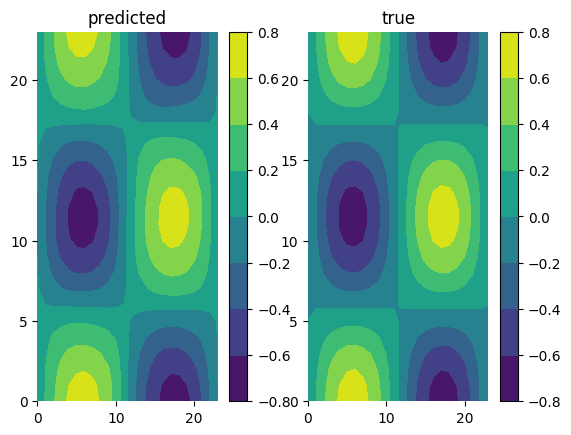

In [12]:
# 测试网络
t = paddle.rand([1])
U0_test = t * paddle.sin(X) * paddle.cos(Y)
U1_test = 0.5 * paddle.sin(X) * paddle.cos(Y) + U0_test

U0_test = U0_test.reshape([1,resolution,resolution,1])
U1_test = U1_test.reshape([1,resolution,resolution,1])
U1_pred = model(U0_test)

err = paddle.square(U1_pred - U1_test)
err_sum = paddle.sum(paddle.square(U1_pred - U1_test)) / paddle.sum(paddle.square(U1_test))
print('initial time:',float(t),'relative error:',float(err_sum))

ax1 = plt.subplot(1, 2, 1, frameon = False) 
plt.contourf(U1_pred.reshape([resolution,resolution]))
plt.colorbar()
plt.title('predicted')
ax2 = plt.subplot(1, 2, 2, frameon = False) 
plt.contourf(U1_test.reshape([resolution,resolution]))
plt.colorbar()
plt.title('true')